


# Análise de comportamento dos usuários de uma Startup do ramo de Alimentos!

# Introdução

Esse projeto explorará uma base de dados de 


## Dicionário de dados

Há um DataFrame que iremos trabalhar:

- `logs_exp_us` (dados sobre comportamento de usuários ao acessar um app de produtos alimentícios):
    - `'EventName'`: nome do evento
    - `'DeviceIDHash'`: identificador de usuário exclusivo
    - `'EventTimestamp'`: hora do evento
    - `'ExpId'`: número do experimento: 246 e 247 são os grupos de controle, 248 é o grupo de teste

## Importando as Bibliotecas:

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
from plotly import graph_objects as go

## Etapa 1. Carregando os dados:

In [2]:
df_logs = pd.read_csv('logs_exp_us.csv', sep='\t')

### DataFrame `Logs`

In [3]:
df_logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Etapa 2. Preparação de dados

-	Verificação e correção os tipos dos dados para Análise
-   Adição de colunas


## Corrigindo os dados:

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [5]:
df_logs.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de:', df_logs.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de:', df_logs.isna().sum())

o número de dados duplicados no Dataframe é de: 0

o número de dados ausentes no Dataframe é de: EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64


**Modificando os títulos das colunas:**

In [6]:
df_logs = df_logs.rename(columns = {'EventName': 'user_action', 'DeviceIDHash': 'user_id', 'EventTimestamp' : 'date_time', 'ExpId' : 'group'})
df_logs.head()

,user_action,user_id,date_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


**Modificando os dados ``datetime`` e criando a coluna ``date`` :**

In [7]:
df_logs['date_time'] = pd.to_datetime(df_logs['date_time'], unit='s')
df_logs['date'] = pd.to_datetime(df_logs['date_time'].dt.date)

In [8]:
df_logs.head()

,user_action,user_id,date_time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


## Etapa 3. Análise Exploratória de Dados (EAD)

**Calculando o número de  ``ações dos usuários`` e adicionando a linha ``Total`` somandos o número total de ações:**

In [9]:
action_count = df_logs['user_action'].value_counts().reset_index()
action_count.columns = ['user_action', 'count']
total_count = action_count['count'].sum()
df_total = pd.DataFrame({'user_action': ['Total'], 'count': [total_count]})
actions_total = pd.concat([action_count, df_total], ignore_index=True)
actions_total

,user_action,count
0,MainScreenAppear,119101
1,OffersScreenAppear,46808
2,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018
5,Total,243713


<span style="color:green;"> Como podemos notar na tabela acima, temos um total de ``243.713`` ações diferentes de usuários no sistema.</span>

**Calculando o número de  ``usuários únicos`` que acessaram o app de alguma forma:**

In [10]:
print("O número total de usuários que acessaram o app foi de:", df_logs['user_id'].nunique())

O número total de usuários que acessaram o app foi de: 7551


**Calculando o número de  médio de ``ações por usuários``:**

In [ ]:
print("O número médio de acões por usuário foi de:", (total_count / df_logs['user_id'].nunique()).round(2))

O número médio de acões por usuário foi de: 32.28


**Analisando o ``período`` dos dados:**

In [ ]:
print("A data mínima do período analisado é:", df_logs['date'].min())
print("A data máxima do período analisado é:", df_logs['date'].max())

A data mínima do período analisado é: 2019-07-25 00:00:00
A data máxima do período analisado é: 2019-08-07 00:00:00


**Plotando um ``histograma`` das datas:**

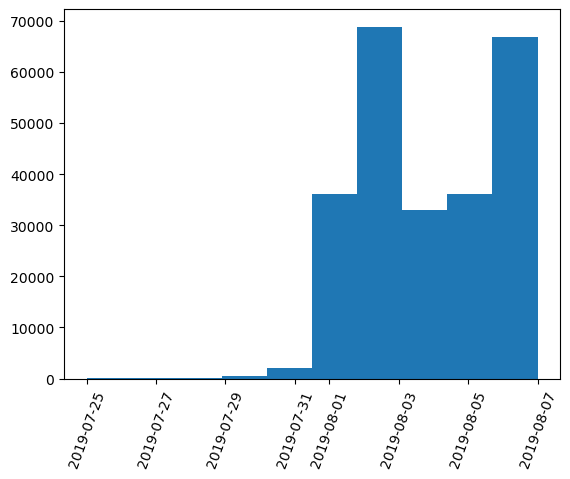

In [ ]:
df_logs['date'].hist(grid=False)
plt.xticks(rotation=70);

<span style="color:green;"> Como podemos notar no gráfico acima, somente há dados significativos a partir da data ``2019-08-01``, o restante será analisado para confirmar se poderemos delimitar o estudo no período em que há dados suficientes para uma boa análise.</span>

**Investigando o ``histograma`` acima:**

In [ ]:
date = df_logs[df_logs['date'] == '2019-07-29'].value_counts().sum()
date_2 = df_logs[df_logs['date'] == '2019-07-31'].value_counts().sum()
date_3 = df_logs[df_logs['date'] == '2019-08-01'].value_counts().sum()
print("O número de linhas de dados da data '2019-07-29' é:", date)
print("O número de linhas de dados da data '2019-07-31' é:", date_2)
print("O número de linhas de dados da data '2019-08-01' é:", date_3)

O número de linhas de dados da data '2019-07-29' é: 184
O número de linhas de dados da data '2019-07-31' é: 2030
O número de linhas de dados da data '2019-08-01' é: 36141


<span style="color:green;"> O que podemos notar na ``investigação`` acima é que realmente não há tantos dados significativos antes da data ``2019-08-01``. Então, prosseguiremos com os dados a partir desta data.</span>

**Estabelecendo um novo ``Dataframe`` para seguir com nossa análise:**

In [ ]:
df_logs_new = df_logs[df_logs['date'] >= '2019-08-01']
df_logs_new

,user_action,user_id,date_time,group,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


**Analisando e garantindo que há usuários de todos os ``grupos`` nos dados filtrados:**

In [ ]:
group_test = df_logs_new.groupby('group').agg({'user_id' : 'nunique'})
group_test

,user_id
group,
246,2484
247,2513
248,2537


<span style="color:green;"> Como podemos notar, ``há usuários suficientes`` de todos os grupos após exclusão dos dados.</span>

## Etapa 4. Estudo de Funil de Vendas

**Classificando as ações dos usuários por ``frequência``:**

In [ ]:
n_actions = df_logs_new['user_action'].value_counts().reset_index()
n_actions.columns = ['user_action', 'count']
n_actions

,user_action,count
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


**Classificando as ações dos usuários por ``frequência``:**

In [ ]:
group_actions = df_logs_new.groupby('user_action').agg({'user_id' : 'nunique'}).sort_values(by='user_id', ascending=False)
group_actions

,user_id
user_action,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


**Proporção de usuários que executaram a ação ``pelo menos uma vez``:**

In [ ]:
sum_actions = group_actions['user_id'].sum()
n_user_once = (sum_actions) / (df_logs['user_id'].nunique())
print("A proporção de usuários únicos que executaram a ação pelo menos uma vez foi de:", n_user_once.round(2))

A proporção de usuários únicos que executaram a ação pelo menos uma vez foi de: 2.67


**Calculando a proporção de usuários que executam as ações em ``sequência``:**

In [ ]:
proportion = [
    None,
    group_actions['user_id'].iloc[1] / group_actions['user_id'].iloc[0],
    group_actions['user_id'].iloc[2] / group_actions['user_id'].iloc[1],
    group_actions['user_id'].iloc[3] / group_actions['user_id'].iloc[2],
    group_actions['user_id'].iloc[4] / group_actions['user_id'].iloc[3]
]

proportion_percent = [f"{p * 100:.2f}%" if p is not None else None for p in proportion]
group_actions['next_stage_proportion'] = proportion_percent
group_actions

,user_id,next_stage_proportion
user_action,,
MainScreenAppear,7419,None
OffersScreenAppear,4593,61.91%
CartScreenAppear,3734,81.30%
PaymentScreenSuccessful,3539,94.78%
Tutorial,840,23.74%


**Plotando o gráfico de ``Funil``:**

In [ ]:
fig = go.Figure(go.Funnel(
    y = group_actions.index,
    x = group_actions['user_id'],
    textinfo = "value+percent initial"
))
fig.update_layout(title='Funil de Conversão de Usuários')
fig.show()

<span style="color:green;"> Como podemos notar na tebala acima, ``7419`` usuários únicos realizaram a ação ``MainScreenAppear`` e em seguida, ``61,91%`` destes usuários realizaram a ação ``OffersScreenAppear`` e novamente em seguida ``81.30%`` suários únicos realizaram a ação ``CartScreenAppear`` e, por fim, ``94.78%`` usuários únicos realizaram a ação ``PaymentScreenSuccessful``. Isso mostra que quanto mais passos os usuários avançam em direção ao processo de finalização da compra, menos usuários fecham o app e desistem da compra. Os usuários que abrem o ``Tutorial`` são somente ``840`` do total.</span>

<span style="color:green;"> A fase que ``mais perdemos usuários`` é na fase ``MainScreenAppear`` para a fase ``OffersScreenAppear`` onde cerca de ``39%`` dos usuários desistem e fecham o app.</span>

**Calculando a Proporção de usuários que completaram o caminho ``desde a primeira ação``:**

In [ ]:
n_user_since_first_action = group_actions['user_id'].iloc[3] / group_actions['user_id'].iloc[0]
n_user_percent = f"{n_user_since_first_action * 100:.2f}%"
print("A porcentagem de usuários que executaram a primeira ação e foram até a última ação de finalização da compra, foi um total de:", n_user_percent)

A porcentagem de usuários que executaram a primeira ação e foram até a última ação de finalização da compra, foi um total de: 47.70%


## Etapa 5. Análise de Teste A/B

**Agrupando as colunas ``group`` e ``user_id`` com a contagem das ``ações dos usuários``:**

In [ ]:
group_test = df_logs_new.groupby(['group', 'user_id']).agg({'user_action' : 'count'}).reset_index()
group_test

,group,user_id,user_action
0,246,6888746892508752,1
1,246,6922444491712477,47
2,246,8740973466195562,9
3,246,12692216027168046,10
4,246,15708180189885246,126
...,...,...,...
7529,248,9212420551954885212,84
7530,248,9212523802225607780,7
7531,248,9214668690707156694,36
7532,248,9219463515465815368,17


**Agrupando as colunas ``group`` e ``user_id`` com a contagem das ``ações dos usuários``:**

In [ ]:
users_action_groupA = group_test.loc[group_test['group'] == 246, 'user_action']
users_action_groupA2 = group_test.loc[group_test['group'] == 247, 'user_action']

**Calculando a variância de ambos os grupos de controle da amostragem:**

In [ ]:
users_action_groupA.var(), users_action_groupA2.var()

(4226.431764987412, 3162.0334958851513)

**Executando o teste estatísico ``Test t``:**

In [ ]:
alpha = 0.05
results = st.ttest_ind(users_action_groupA, users_action_groupA2, equal_var=False)
print('valor-p: ', results.pvalue)
if (results.pvalue < alpha):
    print("Rejeitar a hipótese nula: há uma diferença significativa entre as amostragens")
else:
    print("Não rejeitar a hipótese nula: não há motivos para considerar que existe uma diferença significativa entre as amostragens")

valor-p:  0.4584152588842866
Não rejeitar a hipótese nula: não há motivos para considerar que existe uma diferença significativa entre as amostragens


<span style="color:green;"> Como podemos ver no teste, não conseguimos ver diferenças significativas entre os grupos de controle.</span>

**Criando uma ``tabela pivot`` para agrupar os dados necessários os testes:**

In [ ]:
tab_pivot_test = df_logs_new.pivot_table(index='user_action', values='user_id', columns='group', aggfunc=lambda x: x.nunique())
tab_pivot_test

group,246,247,248
user_action,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


**Agrupando os dados de ``usuários`` por ``grupo``:**

In [ ]:
users_per_group = df_logs_new.pivot_table(index='group', values='user_id', aggfunc=lambda x: x.nunique())['user_id'].reset_index()
users_per_group

,group,user_id
0,246,2484
1,247,2513
2,248,2537


**Criando uma ``Função`` para calcular as ``proporções`` para o teste estatístico para a ação mais popular ``MainScreenAppear``:**

In [ ]:
def check_hypothesis(sucessos1, sucessos2, tentativas1, tentativas2, alpha=0.05):
    proporcao1 = sucessos1 / tentativas1
    proporcao2 = sucessos2 / tentativas2
    proporcao_combinada = (sucessos1 + sucessos2) / (tentativas1 + tentativas2)
    diferenca = proporcao1 - proporcao2
    desvio_padrao = math.sqrt(proporcao_combinada * (1 - proporcao_combinada) * (1/tentativas1 + 1/tentativas2))
    valor_z = diferenca / desvio_padrao
    distribuicao_normal = st.norm(0, 1)
    valor_p = (1 - distribuicao_normal.cdf(abs(valor_z))) * 2

    print('valor-p: ', valor_p)

    if valor_p < alpha:
        print("Rejeitar a hipótese nula: há uma diferença significativa entre as proporções")
    else:
        print("Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes")

tentativas1 = users_per_group.loc[users_per_group['group'] == 246, 'user_id'].values[0]
tentativas2 = users_per_group.loc[users_per_group['group'] == 247, 'user_id'].values[0]

check_hypothesis(tab_pivot_test.loc['MainScreenAppear', 246],
                 tab_pivot_test.loc['MainScreenAppear', 247],
                 tentativas1,
                 tentativas2,
                )

valor-p:  0.7570597232046099
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes


<span style="color:green;"> Como podemos observar no resultado do teste (considerando ``Alpha = 5%``), não há uma diferença significativa entre os dois grupos em relação a ação mais popular ``MainScreenAppear``.</span>

**Criando uma ``Função`` para calcular as ``proporções`` para o teste estatístico para ``cada uma das ações``:**

In [ ]:
def check_event_hypithesis(users_events_per_group, users_per_group,
                           event,
                           exp1, exp2
                          ):
    users_in_exp1 = users_per_group.loc[users_per_group['group'] == exp1, 'user_id'].values[0]
    users_in_exp2 = users_per_group.loc[users_per_group['group'] == exp2, 'user_id'].values[0]
    frac1 = users_events_per_group.loc[event, exp1] / users_in_exp1
    frac2 = users_events_per_group.loc[event, exp2] / users_in_exp2
    print(f'{frac1} with {event} event in group {exp1}')
    print(f'{frac2} with {event} event in group {exp2}')
    check_hypothesis(users_events_per_group.loc[event, exp1],
                     users_events_per_group.loc[event, exp2],
                     users_in_exp1,
                     users_in_exp2,
                    )
for event in tab_pivot_test.index:
    check_event_hypithesis(tab_pivot_test, users_per_group,
                          event, 246, 247)
    print()

0.5096618357487923 with CartScreenAppear event in group 246
0.4926382809391166 with CartScreenAppear event in group 247
valor-p:  0.22883372237997213
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.9863123993558777 with MainScreenAppear event in group 246
0.9852765618782332 with MainScreenAppear event in group 247
valor-p:  0.7570597232046099
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.6207729468599034 with OffersScreenAppear event in group 246
0.6048547552725826 with OffersScreenAppear event in group 247
valor-p:  0.2480954578522181
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.4830917874396135 with PaymentScreenSuccessful event in group 246
0.46080382013529647 with PaymentScreenSuccessful event in group 247
valor-p:  0.11456679313141849
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.11191626409017713 with Tutorial e

<span style="color:green;"> Como podemos observar no resultado do teste (considerando ``Alpha = 5%``), não há diferenças significativas entre os grupos de controle ``246`` e ``247`` em nenhuma das ações.</span>

**Aplicando a ``Função`` para os grupos ``246`` e ``248``:**

In [ ]:
for event in tab_pivot_test.index:
    check_event_hypithesis(tab_pivot_test, users_per_group,
                          event, 246, 248)
    print()

0.5096618357487923 with CartScreenAppear event in group 246
0.48482459597950334 with CartScreenAppear event in group 248
valor-p:  0.07842923237520116
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.9863123993558777 with MainScreenAppear event in group 246
0.9826566811194324 with MainScreenAppear event in group 248
valor-p:  0.2949721933554552
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.6207729468599034 with OffersScreenAppear event in group 246
0.6034686637761135 with OffersScreenAppear event in group 248
valor-p:  0.20836205402738917
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.4830917874396135 with PaymentScreenSuccessful event in group 246
0.46551044540796216 with PaymentScreenSuccessful event in group 248
valor-p:  0.2122553275697796
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.11191626409017713 with Tutorial 

<span style="color:green;"> Como podemos observar no resultado do teste (considerando ``Alpha = 5%``), não há diferenças significativas entre os grupo de controle ``246`` e o grupo teste ``248`` em nenhuma das ações.</span>

**Aplicando a ``Função`` para os grupos ``247`` e ``248``:**

In [ ]:
for event in tab_pivot_test.index:
    check_event_hypithesis(tab_pivot_test, users_per_group,
                          event, 247, 248)
    print()

0.4926382809391166 with CartScreenAppear event in group 247
0.48482459597950334 with CartScreenAppear event in group 248
valor-p:  0.5786197879539783
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.9852765618782332 with MainScreenAppear event in group 247
0.9826566811194324 with MainScreenAppear event in group 248
valor-p:  0.4587053616621515
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.6048547552725826 with OffersScreenAppear event in group 247
0.6034686637761135 with OffersScreenAppear event in group 248
valor-p:  0.9197817830592261
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.46080382013529647 with PaymentScreenSuccessful event in group 247
0.46551044540796216 with PaymentScreenSuccessful event in group 248
valor-p:  0.7373415053803964
Não rejeitar a hipótese nula: não há motivos para considerar as proporções diferentes

0.11261440509351373 with Tutorial e

<span style="color:green;"> Como podemos observar no resultado do teste (considerando ``Alpha = 5%``), não há diferenças significativas entre os grupo de controle ``247`` e o grupo teste ``248`` em nenhuma das ações.</span>

### Conclusão dos ``testes``:

-   Podemos concluir que nenhum dos grupos tem ``diferenças estatisticamente signficativas`` em relação as ações executadas pelos os usuários dos dois grupos controle e o grupo teste. Mesmo que fosse aplicado um nível de significância (Alpha) de ``10%`` ou ``menor que 5%``, não haveria diferença no resultado final do teste.

# Conclusão geral

- Para concluir, gostaria de fazer alguns apontamentos:
    - Dentre os eventos mapeados de acordo com as ações dos usuários, a fase que mais perdemos usuários é na fase ``MainScreenAppear`` para a fase ``OffersScreenAppear`` onde cerca de ``39%`` dos usuários desistem e fecham o app;
    - ``47% dos usuários`` executaram até a última ação de ``PaymentScreenSuccessful``;
    - ``Não há`` diferenças estatisticamente significativas entre os grupos controle e teste.